In [1]:
import os
import sys

sys.path.append(os.getcwd() + "/")

In [2]:
from experiments import setup_experiments

exps = setup_experiments("exp205")

In [4]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

no_bias_dir = Path("/data/Data/SimBA-MACAW/no_bias/data/images/test")
far_bias_dir = Path(exps.path) / "test"
far_bias_csv = Path(exps.path) / "test.csv"

macaw_cf_dir = Path(exps.path) / "macaw_cfs" / "no_bias"
hvae_cf_dir = Path(exps.path) / "hvae_cfs" / "no_bias"

macaw_pred_csv = Path(exps.path) / "macaw_cfs" / "no_bias" / "predictions.csv"
hvae_pred_csv = Path(exps.path) / "hvae_cfs" / "no_bias" / "predictions.csv"

df = pd.read_csv(far_bias_csv, low_memory=True)

macaw_pred_df = pd.read_csv(macaw_pred_csv, low_memory=True)
macaw_pred_dict = dict(zip(macaw_pred_df["filename"], macaw_pred_df["predictions"]))
df["MACAW_sfcn_pred"] = df["filename"].map(macaw_pred_dict)

hvae_pred_df = pd.read_csv(hvae_pred_csv, low_memory=True)
hvae_pred_dict = dict(zip(hvae_pred_df["filename"], hvae_pred_df["predictions"]))
df["HVAE_sfcn_pred"] = df["filename"].map(hvae_pred_dict)

df = df[df["bias_label"] == 0]
df["filename"] = [f.replace("nii.gz", "tiff") for f in df["filename"]]

FileNotFoundError: [Errno 2] No such file or directory: 'data/exp205/data/csv/test.csv'

In [37]:
df

,Unnamed: 0,isv_dst,effect_dst,isv_bin,effect_bin,both_bins,bias_label,class_label,strat_col,filepath,filename,MACAW_sfcn_pred,HVAE_sfcn_pred
248,227,0.455448,0.341941,5,4,5_4,0,1,1_0_4_5,/home/emma/Documents/SBB/datasets/exp140/test/...,00248_0.455_S_0.342_D.tiff,0,0
249,532,-1.500132,-1.841480,2,3,2_3,0,0,0_0_3_2,/home/emma/Documents/SBB/datasets/exp140/test/...,00249_-1.5_S_-1.841_D.tiff,0,0
250,987,-0.806768,0.161106,3,7,3_7,0,0,0_0_7_3,/home/emma/Documents/SBB/datasets/exp140/test/...,00250_-0.807_S_0.161_D.tiff,0,0
251,118,1.257066,-0.560441,6,6,6_6,0,0,0_0_6_6,/home/emma/Documents/SBB/datasets/exp140/test/...,00251_1.257_S_-0.56_D.tiff,0,0
252,371,0.520771,-1.033273,5,5,5_5,0,0,0_0_5_5,/home/emma/Documents/SBB/datasets/exp140/test/...,00252_0.521_S_-1.033_D.tiff,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,65,-1.302720,-0.683521,2,5,2_5,0,0,0_0_5_2,/home/emma/Documents/SBB/datasets/exp140/test/...,00494_-1.303_S_-0.684_D.tiff,0,0
495,249,1.773702,-0.919812,7,5,7_5,0,0,0_0_5_7,/home/emma/Documents/SBB/datasets/exp140/test/...,00495_1.774_S_-0.92_D.tiff,0,0
496,455,1.030393,-1.904766,6,3,6_3,0,0,0_0_3_6,/home/emma/Documents/SBB/datasets/exp140/test/...,00496_1.03_S_-1.905_D.tiff,0,0
497,833,-0.472651,-0.411404,3,6,3_6,0,0,0_0_6_3,/home/emma/Documents/SBB/datasets/exp140/test/...,00497_-0.473_S_-0.411_D.tiff,0,0


In [38]:
import numpy as np
from tifffile import tifffile as tiff


def four_images(idx):
    no_bias_img = tiff.imread(
        os.path.join(no_bias_dir, df.iloc[idx]["filename"])
    ).squeeze()
    far_bias_img = tiff.imread(
        os.path.join(far_bias_dir, df.iloc[idx]["filename"])
    ).squeeze()
    macaw_cf_img = tiff.imread(
        os.path.join(macaw_cf_dir, df.iloc[idx]["filename"])
    ).squeeze()
    hvae_cf_img = tiff.imread(
        os.path.join(hvae_cf_dir, df.iloc[idx]["filename"])
    ).squeeze()

    return no_bias_img, far_bias_img, macaw_cf_img, hvae_cf_img

In [39]:
# no_bias_img, far_bias_img, macaw_cf_img = three_images(np.random.randint(0,n,1).squeeze())


def view_images(idx):
    no_bias_img, far_bias_img, macaw_cf_img, hvae_cf_img = four_images(idx)

    print(np.max(no_bias_img), np.min(no_bias_img))
    print(np.max(macaw_cf_img), np.min(macaw_cf_img))
    print(np.max(hvae_cf_img), np.min(hvae_cf_img))

    fig, axs = plt.subplots(2, 4, figsize=(10, 4))
    [
        a.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        for ax in axs
        for a in ax
    ]

    axs[0, 0].imshow(no_bias_img, cmap="gray")
    axs[0, 0].set_title("Ground truth (GT)")

    axs[0, 1].imshow(far_bias_img, cmap="gray")
    axs[0, 1].set_title("Biased")

    axs[0, 2].imshow(macaw_cf_img, cmap="gray")
    axs[0, 2].set_title("MACAW CF")

    axs[0, 3].imshow(hvae_cf_img, cmap="gray")
    axs[0, 3].set_title("HVAE CF")

    fig.delaxes(axs[1, 0])

    axs[1, 1].imshow(far_bias_img - no_bias_img, cmap="seismic", clim=(-1, 1))
    axs[1, 1].set_title("Biased -GT")

    axs[1, 2].imshow(macaw_cf_img - no_bias_img, cmap="seismic", clim=(-1, 1))
    axs[1, 2].set_title("MACAW CF - GT")

    axs[1, 3].imshow(hvae_cf_img - no_bias_img, cmap="seismic", clim=(-1, 1))
    axs[1, 3].set_title("HVAE CF - GT")

    fig.savefig("diff.png")

In [40]:
def TEA(no_bias_img, far_bias_img, cf_img):
    no_far = (no_bias_img - far_bias_img).flatten()
    cf_far = (cf_img - far_bias_img).flatten()

    no_far_mag = np.linalg.norm(no_far)
    cf_far_mag = np.linalg.norm(cf_far)
    projection = no_far.dot(cf_far) / no_far_mag

    bias_removal = projection / no_far_mag
    unwanted_changes = np.sqrt(cf_far_mag**2 - projection**2)

    return bias_removal, unwanted_changes

In [41]:
n = len(df)

macaw_brs = []
macaw_ucs = []

hvae_brs = []
hvae_ucs = []
for i in range(n):
    no, far, macaw, hvae = four_images(i)

    br, uc = TEA(no, far, macaw)
    macaw_brs.append(br)
    macaw_ucs.append(uc)

    br, uc = TEA(no, far, hvae)
    hvae_brs.append(br)
    hvae_ucs.append(uc)

df["macaw_bias_removal"] = macaw_brs
df["macaw_unwanted_changes"] = macaw_ucs

df["hvae_bias_removal"] = hvae_brs
df["hvae_unwanted_changes"] = hvae_ucs

<ipython-input-40-05463fad4072>:7: RuntimeWarning: invalid value encountered in double_scalars
  projection = no_far.dot(cf_far) / no_far_mag
<ipython-input-40-05463fad4072>:7: RuntimeWarning: invalid value encountered in float_scalars
  projection = no_far.dot(cf_far) / no_far_mag


In [42]:
df

,Unnamed: 0,isv_dst,effect_dst,isv_bin,effect_bin,both_bins,bias_label,class_label,strat_col,filepath,filename,MACAW_sfcn_pred,HVAE_sfcn_pred,macaw_bias_removal,macaw_unwanted_changes,hvae_bias_removal,hvae_unwanted_changes
248,227,0.455448,0.341941,5,4,5_4,0,1,1_0_4_5,/home/emma/Documents/SBB/datasets/exp140/test/...,00248_0.455_S_0.342_D.tiff,0,0,NaN,NaN,NaN,NaN
249,532,-1.500132,-1.841480,2,3,2_3,0,0,0_0_3_2,/home/emma/Documents/SBB/datasets/exp140/test/...,00249_-1.5_S_-1.841_D.tiff,0,0,NaN,NaN,NaN,NaN
250,987,-0.806768,0.161106,3,7,3_7,0,0,0_0_7_3,/home/emma/Documents/SBB/datasets/exp140/test/...,00250_-0.807_S_0.161_D.tiff,0,0,NaN,NaN,NaN,NaN
251,118,1.257066,-0.560441,6,6,6_6,0,0,0_0_6_6,/home/emma/Documents/SBB/datasets/exp140/test/...,00251_1.257_S_-0.56_D.tiff,0,0,NaN,NaN,NaN,NaN
252,371,0.520771,-1.033273,5,5,5_5,0,0,0_0_5_5,/home/emma/Documents/SBB/datasets/exp140/test/...,00252_0.521_S_-1.033_D.tiff,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,65,-1.302720,-0.683521,2,5,2_5,0,0,0_0_5_2,/home/emma/Documents/SBB/datasets/exp140/test/...,00494_-1.303_S_-0.684_D.tiff,0,0,NaN,NaN,NaN,NaN
495,249,1.773702,-0.919812,7,5,7_5,0,0,0_0_5_7,/home/emma/Documents/SBB/datasets/exp140/test/...,00495_1.774_S_-0.92_D.tiff,0,0,NaN,NaN,NaN,NaN
496,455,1.030393,-1.904766,6,3,6_3,0,0,0_0_3_6,/home/emma/Documents/SBB/datasets/exp140/test/...,00496_1.03_S_-1.905_D.tiff,0,0,NaN,NaN,NaN,NaN
497,833,-0.472651,-0.411404,3,6,3_6,0,0,0_0_6_3,/home/emma/Documents/SBB/datasets/exp140/test/...,00497_-0.473_S_-0.411_D.tiff,0,0,NaN,NaN,NaN,NaN


In [43]:
df["bias_effect"] = [float(i.split("_")[-2]) for i in df["filename"]]
df["disease_effect"] = [float(i.split("_")[3]) for i in df["filename"]]
df["subject_effect"] = [float(i.split("_")[1]) for i in df["filename"]]
df["isv_dst_abs"] = np.abs(df["isv_dst"])

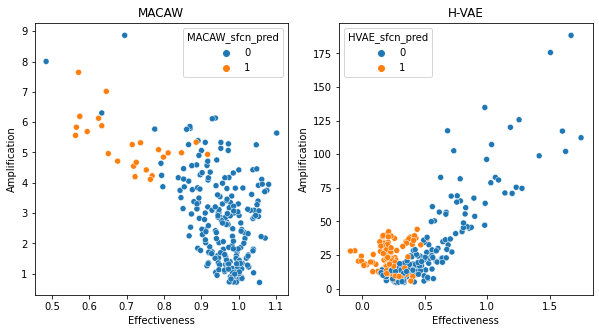

In [27]:
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(
    x="macaw_bias_removal",
    y="macaw_unwanted_changes",
    hue="MACAW_sfcn_pred",
    data=df,
    ax=axs[0],
)
axs[0].set(title="MACAW", xlabel="Effectiveness", ylabel="Amplification")
sns.scatterplot(
    x="hvae_bias_removal",
    y="hvae_unwanted_changes",
    hue="HVAE_sfcn_pred",
    data=df,
    ax=axs[1],
)
axs[1].set(title="H-VAE", xlabel="Effectiveness", ylabel="Amplification")


fig.savefig("sfcn.png")

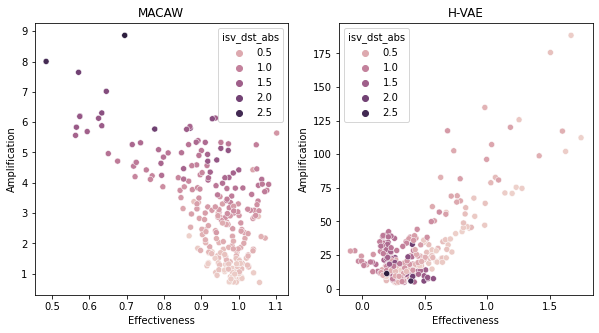

In [28]:
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(
    x="macaw_bias_removal",
    y="macaw_unwanted_changes",
    hue="isv_dst_abs",
    data=df,
    ax=axs[0],
)
axs[0].set(title="MACAW", xlabel="Effectiveness", ylabel="Amplification")
sns.scatterplot(
    x="hvae_bias_removal",
    y="hvae_unwanted_changes",
    hue="isv_dst_abs",
    data=df,
    ax=axs[1],
)
axs[1].set(title="H-VAE", xlabel="Effectiveness", ylabel="Amplification")

fig.savefig("isv.png")

In [29]:
np.argmax(df["macaw_bias_removal"])

215

1.0 0.0
0.9956286292514274 0.0
1.1851852 0.0


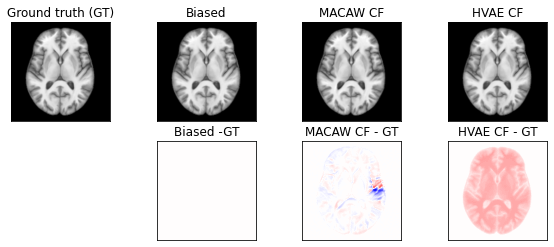

In [46]:
view_images(6)


<Axes: xlabel='subject_effect', ylabel='bias_effect'>

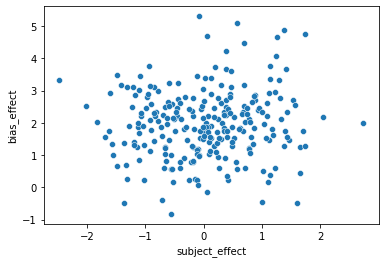

In [16]:
sns.scatterplot(x="subject_effect", y="bias_effect", data=df)

<Axes: xlabel='subject_effect', ylabel='bias_effect'>

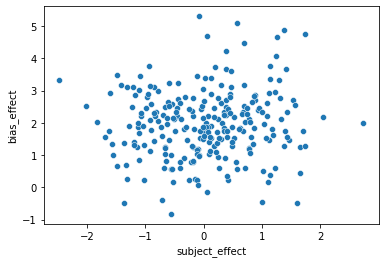

In [17]:
sns.scatterplot(x="subject_effect", y="bias_effect", data=df)

<Axes: xlabel='bias_effect', ylabel='disease_effect'>

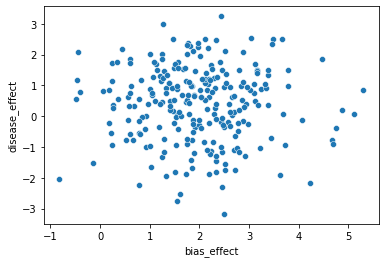

In [18]:
sns.scatterplot(x="bias_effect", y="disease_effect", data=df)